<a href="https://colab.research.google.com/github/xCocco0/alzheimer-recognition/blob/main/alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title
This is the description of the project.

---
### Import modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

### Load data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/oasis3-normalized.csv")

In [4]:
print("--- Overview ---\n",df.describe())

print("\n--- Correlation ---\n",df[["mmse",'cdr','age','weight','height','eTIV','brainVol','nWBV','ventricleVol','ventricleRatio','hcVol','hcRatio']].corr())

--- Overview ---
               sex         age       height      weight   education  \
count  893.000000  893.000000   893.000000  893.000000  893.000000   
mean     0.456887   68.653975  1675.709966   77.471445   15.614782   
std      0.498417    8.858256    97.005027   17.042696    2.766205   
min      0.000000   42.000000  1295.000000   37.000000    0.000000   
25%      0.000000   64.000000  1600.000000   65.000000   13.000000   
50%      0.000000   69.000000  1676.000000   76.000000   16.000000   
75%      1.000000   74.000000  1753.000000   87.000000   18.000000   
max      1.000000   94.000000  2007.000000  148.000000   24.000000   

             hand        mmse         cdr          eTIV      brainVol  \
count  893.000000  893.000000  893.000000  8.930000e+02  8.930000e+02   
mean     0.931691   27.638298    0.221725  1.505546e+06  8.827183e+05   
std      0.322604    3.579991    0.396309  1.846496e+05  1.082714e+05   
min      0.000000    4.000000    0.000000  1.000078e+06  6.

### Graphs

---
# TEST

In [5]:
# for conversion
index2color = {0:'#64C4E480', 1:'#FFA000A0', 2:'#FF7000A0', 3:'#FF0000A0'}
index2label = {0:'Non demented', 1:'Very mild dementia', 2:'Mild dementia', 3:'Moderate dementia'}
index2cdr = {0:0.0, 1:0.5, 2:1.0, 3:2.0}
cdr2index = {0.0:0, 0.5:1, 1.0:2, 2.0:3}

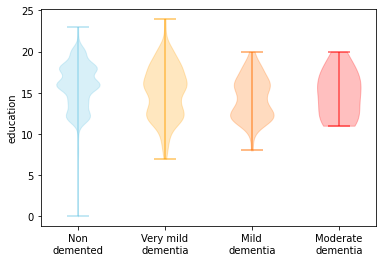

In [6]:
fig, ax = plt.subplots()

index = 0
for i in [0,0.5,1,2]:
  parts = ax.violinplot([
               df[df.cdr == i]['education'].to_numpy(dtype = float),
              ], [index+1])

  parts['bodies'][0].set_color(index2color[index])
  parts['cbars'].set_color(index2color[index])
  parts['cmins'].set_color(index2color[index])
  parts['cmaxes'].set_color(index2color[index])
  parts['bodies'][0].set_alpha(0.25)
  index += 1

ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Non\ndemented', 'Very mild\ndementia', 'Mild\ndementia', 'Moderate\ndementia'])
ax.set_ylabel('education')
plt.show()

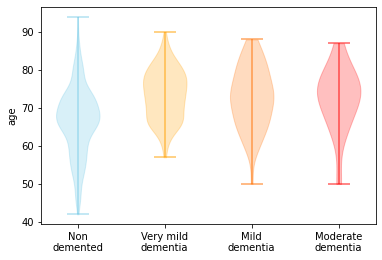

In [7]:
fig, ax = plt.subplots()

index = 0
for i in [0,0.5,1,2]:
  parts = ax.violinplot([
               df[df.cdr == i]['age'].to_numpy(dtype = float),
              ], [index+1])

  parts['bodies'][0].set_color(index2color[index])
  parts['cbars'].set_color(index2color[index])
  parts['cmins'].set_color(index2color[index])
  parts['cmaxes'].set_color(index2color[index])
  parts['bodies'][0].set_alpha(0.25)
  index += 1

ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Non\ndemented', 'Very mild\ndementia', 'Mild\ndementia', 'Moderate\ndementia'])
ax.set_ylabel('age')
plt.show()

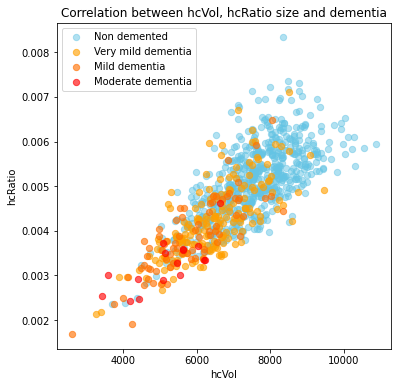

In [8]:
#@title Insert axes for correlation plot
x = "hcVol" #@param ["age", "height", "weight", "eTIV", "brainVol", "nWBV", "ventricleVol", "ventricleRatio", "hcVol", "hcRatio"]
y = "hcRatio" #@param ["age", "height", "weight", "eTIV", "brainVol", "nWBV", "ventricleVol", "ventricleRatio", "hcVol", "hcRatio"]

def corr_plot(x,y,title=f"Correlation between {x}, {y} size and dementia",labelx=x,labely=y,dotsize=40):
  fig, ax = plt.subplots(figsize=(6, 6))
  for i in range(0,4):
    ax.scatter(df[df.cdr == index2cdr[i]][x],
              df[df.cdr == index2cdr[i]][y],
              c = index2color[i],
              label = index2label[i], s = dotsize)
  ax.legend()
  ax.set_title(f"Correlation between {x}, {y} size and dementia")
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

corr_plot(x,y)


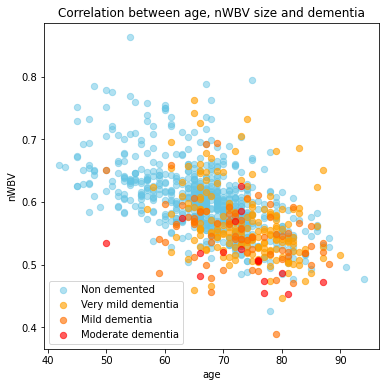

In [9]:
corr_plot('age','nWBV',
          "Correlation between Brain Volume / Age and dementia",'Age (years)','nWBV')

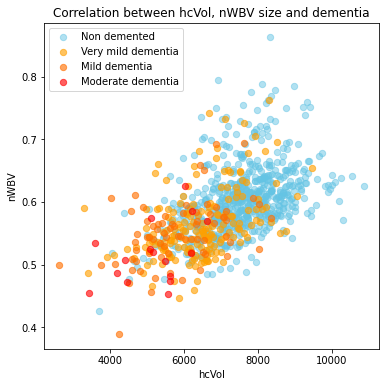

In [10]:
corr_plot('hcVol','nWBV',
          "Correlation between nWBV, hippocampus size and dementia",'hcVol (mm\u00B3)','nWBV')

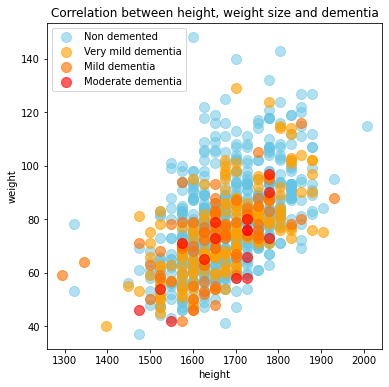

In [11]:
corr_plot('height','weight',
          'Correlation between Height/Weight and dementia','Height (mm)','Weight (kg)',100)

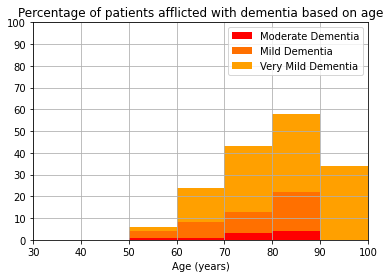

In [12]:
delta = 10
numbars = 10
hist = np.zeros((numbars,5))
hist_labels = np.arange(delta/2,delta*(numbars+1/2),delta)

for index, row in df.iterrows():
  hist[int(row["age"]/delta), cdr2index[row["cdr"]]+1] += 1
  hist[int(row["age"]/delta), 0] += 1
#print(hist)
for row in hist:
  for i in range(1,5):
    if row[0] == 0:
      row[i] = 0
    else:
      row[i] = np.ceil(100 * row[i] / row[0])
#print(hist)

fig, ax = plt.subplots()
ax.bar(hist_labels, hist[:,4], width = 10, color = "#FF0000", label = "Moderate Dementia")
ax.bar(hist_labels, hist[:,3], width = 10, bottom = hist[:,4], color = "#FF7000", label = "Mild Dementia")
ax.bar(hist_labels, hist[:,2], width = 10, bottom = hist[:,4]+hist[:,3], color = "#FFA000", label = "Very Mild Dementia")
#ax.bar(hist_labels, hist[:,1], width = 10, bottom = hist[:,4]+hist[:,3]+hist[:,2], color = "#64C4E4")

ax.set_title("Percentage of patients afflicted with dementia based on age")
ax.set_ylim(0,100)
ax.set_xlim(30,100)
ax.set_yticks(range(0,101,10))
ax.grid()
ax.set_xlabel("Age (years)")
ax.legend()
plt.show()


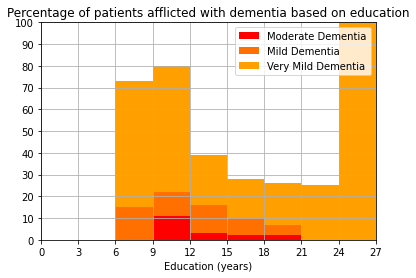

In [13]:
delta = 3
numbars = 9
hist = np.zeros((numbars,5))
hist_labels = np.arange(delta/2,delta*(numbars+1/2),delta)

for index, row in df.iterrows():
  hist[int(row["education"]/delta), cdr2index[row["cdr"]]+1] += 1
  hist[int(row["education"]/delta), 0] += 1
#print(hist)
for row in hist:
  for i in range(1,5):
    if row[0] == 0:
      row[i] = 0
    else:
      row[i] = np.ceil(100 * row[i] / row[0])
#print(hist)

fig, ax = plt.subplots()
ax.bar(hist_labels, hist[:,4], width = delta, color = "#FF0000", label = "Moderate Dementia")
ax.bar(hist_labels, hist[:,3], width = delta, bottom = hist[:,4], color = "#FF7000", label = "Mild Dementia")
ax.bar(hist_labels, hist[:,2], width = delta, bottom = hist[:,4]+hist[:,3], color = "#FFA000", label = "Very Mild Dementia")
#ax.bar(hist_labels, hist[:,1], width = 10, bottom = hist[:,4]+hist[:,3]+hist[:,2], color = "#64C4E4")
ax.set_title("Percentage of patients afflicted with dementia based on education")
ax.set_ylim(0,100)
ax.set_xlim(0,delta*numbars)
ax.set_xticks(range(0,delta*numbars+1,delta))
ax.set_yticks(range(0,101,10))
ax.grid()
ax.set_xlabel("Education (years)")
ax.legend()
plt.show()

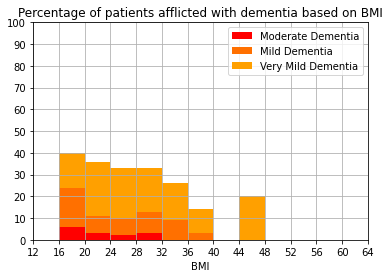

In [14]:
delta = 4
numbars = 20
hist = np.zeros((numbars,5))
hist_labels = np.arange(delta/2,delta*(numbars+1/2),delta)

dfbmi = df.loc[:,["height","weight","cdr"]]
dfbmi["bmi"] = (1000000*df["weight"])/(df["height"]**2)
#print(dfbmi)

for index, row in dfbmi.iterrows():
  hist[int(row["bmi"]/delta), cdr2index[row["cdr"]]+1] += 1
  hist[int(row["bmi"]/delta), 0] += 1
#print(hist)
for row in hist:
  for i in range(1,5):
    if row[0] == 0:
      row[i] = 0
    else:
      row[i] = np.ceil(100 * row[i] / row[0])
#print(hist)

fig, ax = plt.subplots()
ax.bar(hist_labels, hist[:,4], width = delta, color = "#FF0000", label = "Moderate Dementia")
ax.bar(hist_labels, hist[:,3], width = delta, bottom = hist[:,4], color = "#FF7000", label = "Mild Dementia")
ax.bar(hist_labels, hist[:,2], width = delta, bottom = hist[:,4]+hist[:,3], color = "#FFA000", label = "Very Mild Dementia")
#ax.bar(hist_labels, hist[:,1], width = 10, bottom = hist[:,4]+hist[:,3]+hist[:,2], color = "#64C4E4")
ax.set_title("Percentage of patients afflicted with dementia based on BMI")
ax.set_ylim(0,100)
ax.set_xlim(12,48)
ax.set_xticks(range(12,delta*16+1,delta))
ax.set_yticks(range(0,101,10))
ax.grid()
ax.set_xlabel("BMI")
ax.legend()
plt.show()

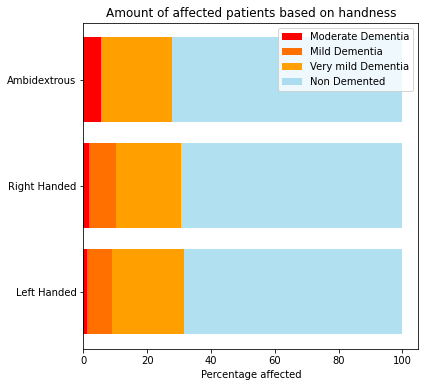

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
bars = np.empty((4,3))

for i in range(0,4):
  for j in range(0,3):
    bars[i,j] = df[(df.hand == j) & (df.cdr == index2cdr[i])].loc[:,"id"].count()
#print(handness)
for i in range(0,3):
  bars[:,i] /= np.sum(bars[:,i])
bars = (bars*100)
#print(bars)
colormap = {0.0:'#64C4E480', 0.5:'#FFA000A0', 1.0:'#FF7000A0', 2.0:'#FF0000A0'}
ax.barh([1,2,3], bars[3,:], color = "#FF0000", label = "Moderate Dementia")
ax.barh([1,2,3], bars[2,:], left = bars[3,:], color = "#FF7000", label = "Mild Dementia")
ax.barh([1,2,3], bars[1,:], left = bars[3,:]+bars[2,:], color = "#FFA000", label = "Very mild Dementia")
ax.barh([1,2,3], bars[0,:], left = bars[3,:]+bars[2,:]+bars[1,:], color = "#64C4E480", label = "Non Demented")
ax.set_yticks([1,2,3])
ax.set_yticklabels(['Left Handed','Right Handed','Ambidextrous'])
ax.set_xlabel("Percentage affected")
ax.set_title("Amount of affected patients based on handness")
ax.legend()
plt.show()

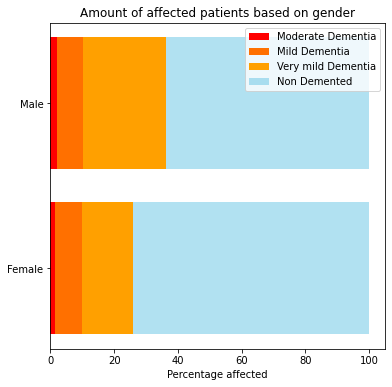

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
bars = np.empty((4,2))

for i in range(0,4):
  for j in range(0,2):
    bars[i,j] = df[(df.sex == j) & (df.cdr == index2cdr[i])].loc[:,"id"].count()
#print(bars)
for i in range(0,2):
  bars[:,i] /= np.sum(bars[:,i])
bars = (bars*100)
#print(bars)
colormap = {0.0:'#64C4E480', 0.5:'#FFA000A0', 1.0:'#FF7000A0', 2.0:'#FF0000A0'}
ax.barh([1,2], bars[3,:], color = "#FF0000", label = "Moderate Dementia")
ax.barh([1,2], bars[2,:], left = bars[3,:], color = "#FF7000", label = "Mild Dementia")
ax.barh([1,2], bars[1,:], left = bars[3,:]+bars[2,:], color = "#FFA000", label = "Very mild Dementia")
ax.barh([1,2], bars[0,:], left = bars[3,:]+bars[2,:]+bars[1,:], color = "#64C4E480", label = "Non Demented")
ax.set_yticks([1,2])
ax.set_yticklabels(['Female','Male'])
ax.set_xlabel("Percentage affected")
ax.set_title("Amount of affected patients based on gender")
ax.legend()
plt.show()

---
# Training

In [64]:
import sklearn.model_selection
import sklearn.linear_model
import sklearn.neighbors
import sklearn.svm
import sklearn.metrics
import sklearn.preprocessing
import sklearn.calibration

#X = df[["age","sex","height","weight","hand","education","nWBV","ventricleRatio","hcRatio"]].to_numpy(dtype = float)
X = df[["age","sex","height","weight","hand","education","eTIV","brainVol","ventricleVol","hcVol"]].to_numpy(dtype = float)
#X = df[["mmse","education","nWBV"]].to_numpy(dtype = float)
y = np.ravel(df[["cdr"]].to_numpy(dtype = float))

#y = np.where(y > 0, 1, 0)
le = sklearn.preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.15, random_state = 34)
#print(X_train, X_test, y_train, y_test)

score_matrix = np.array(
    [[100, 10,  5,  0],
     [ 30,100, 10,  5],
     [ 10, 50,100, 10],
     [  5, 20, 70,100]]
)
print(score_matrix)
def score(y,y_pred):
  n = len(y)
  sc = np.array((n))
  for i in range(n):
    sc = score_matrix[y[i],y_pred[i]]
  return sc

myscorer = sklearn.metrics.make_scorer(score)

# clf = sklearn.linear_model.LinearRegression()
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print(y_pred)
# print(y_test.shape,y_pred.shape)
# print(sklearn.metrics.accuracy_score(y_test, y_pred))

#print(X_train[:100,:])
clf = sklearn.linear_model.LogisticRegressionCV(
    max_iter = 9999,
    #class_weight = {0:1,1:2,2:2,3:3},
    scoring = myscorer,
    )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(y_pred)
print(y_test)
print(sklearn.metrics.confusion_matrix(y_test,y_pred))
#print(sklearn.metrics.accuracy_score(y_test,y_pred))




[[100  10   5   0]
 [ 30 100  10   5]
 [ 10  50 100  10]
 [  5  20  70 100]]
[0 0 0 2 0 0 1 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 2 0
 0 0 0 0 1 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 2 1 0 0 0 1 0 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 2 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 2 1 0
 0 0 1 0 3 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 2 3 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1]
[[97  3  1  0]
 [12  7  4  0]
 [ 5  2  1  0]
 [ 0  2  0  0]]


# References
- https://www.oasis-brains.org/
- https://www.oasis-brains.org/files/OASIS-3_Imaging_Data_Dictionary_v1.5.pdf
- https://surfer.nmr.mgh.harvard.edu/fswiki/MorphometryStats
- http://www.ajnr.org/content/22/8/1483
- https://jamanetwork.com/journals/jamaneurology/fullarticle/775393
- http://perspectivesinmedicine.cshlp.org/content/2/4/a006213.long
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5390933/
- https://link.springer.com/article/10.1007/s00415-008-0750-9